In [1]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
from itertools import combinations
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
Asia_Pac_index = pd.read_csv("Data/csv/AsiaPacAggIdx_2000.csv")
EM_index = pd.read_csv("Data/csv/EMAggIdx_2000.csv")
Global_Agg_index = pd.read_csv("Data/csv/GlobalAggIdx_2000.csv")
PanEuro_Index = pd.read_csv("Data/csv/PanEuroAggIdx_2000.csv")
US_index = pd.read_csv("Data/csv/USAggIdx_2000.csv")

In [3]:
print(Asia_Pac_index)

            Date   PX_LAST  PX_VOLUME
0      11/2/2023  173.8605        NaN
1      11/1/2023  173.4825        NaN
2     10/31/2023  173.8414        NaN
3     10/30/2023  172.6046        NaN
4     10/27/2023  172.9983        NaN
...          ...       ...        ...
5832  11/13/2000  100.3547        NaN
5833  11/10/2000  100.2023        NaN
5834   11/9/2000  100.1677        NaN
5835   11/8/2000  100.0762        NaN
5836   11/7/2000  100.0844        NaN

[5837 rows x 3 columns]


In [4]:
# check for stationarity for all 3
def check_for_stationarity(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    # adfuller (augmented dicky fuller test) is a statistically significant test for stationary dataset
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
        return True
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')
        return False

In [5]:
series_list = []
Asia_Pac_series = Asia_Pac_index['PX_LAST']
Asia_Pac_series.name = 'Asia_Pac'
Asia_Pac_series.index = Asia_Pac_index['Date']
EM_series = EM_index['PX_LAST']
EM_series.name = 'EM'
EM_series.index = EM_index['Date']
Global_Agg_series = Global_Agg_index['PX_LAST']
Global_Agg_series.name = 'Global_Agg'
Global_Agg_series.index = Global_Agg_index['Date']
PanEuro_series = PanEuro_Index['PX_LAST']
PanEuro_series.name = 'PanEuro'
PanEuro_series.index = PanEuro_Index['Date']
US_series = US_index['PX_LAST']
US_series.name = 'US'
US_series.index = US_index['Date']

series_list.append(Asia_Pac_series)
series_list.append(EM_series)
series_list.append(Global_Agg_series)
series_list.append(PanEuro_series)
series_list.append(US_series)

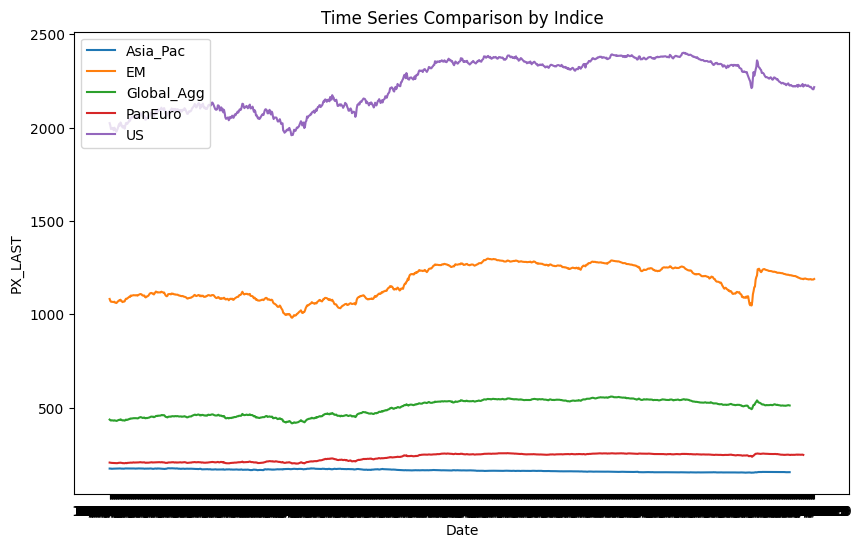

In [6]:
# Plotting
plt.figure(figsize=(10, 6))

for series in series_list:
    # only plot first 1000 datapoints
    plt.plot(series.index[:1000], series[:1000], label=series.name)

plt.title('Time Series Comparison by Indice')
plt.xlabel('Date')
plt.ylabel('PX_LAST')
plt.legend()
plt.show()

In [7]:

# Create a figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
for series in series_list:
    fig.add_trace(
        go.Scatter(x=series.index[:1000], y=series[:1000], mode='lines', name=series.name),
        secondary_y=False,
    )

# Update layout
fig.update_layout(
    title='Time Series Comparison by Indice - Interactive',
    xaxis_title='Date',
    yaxis_title='PX_LAST',
    legend_title='Indice',
    xaxis_rangeslider_visible=True,  # Enable the range slider for the x-axis
)

# Show figure
fig.show()

In [8]:
for series in series_list:
    check_for_stationarity(series)

p-value = 0.5886920652964842 The series Asia_Pac is likely non-stationary.
p-value = 0.9656288630164678 The series EM is likely non-stationary.
p-value = 0.9951489686720575 The series Global_Agg is likely non-stationary.
p-value = 0.9953483016883817 The series PanEuro is likely non-stationary.
p-value = 0.9948305295652796 The series US is likely non-stationary.


In [9]:
# Check for I(1) stationarity
series_diff_list = []
for series in series_list:
    series_1 = series.diff()[1:]
    series_1.name = series.name + '_1'
    series_diff_list.append(series_1)

for series_diff in series_diff_list:
    check_for_stationarity(series_diff)

p-value = 1.285407760624804e-29 The series Asia_Pac_1 is likely stationary.
p-value = 3.331711292852159e-24 The series EM_1 is likely stationary.
p-value = 0.0 The series Global_Agg_1 is likely stationary.
p-value = 0.0 The series PanEuro_1 is likely stationary.
p-value = 6.153732808729947e-24 The series US_1 is likely stationary.


In [10]:
# normalize series length to 5756
coint_series = []
for series in series_list:
    coint_series.append(series[:5756])


In [11]:
# check for cointegration
# 5 choose 2 -> 10 pairs

pairs = list(combinations(coint_series, 2))
for pair in pairs:
    coint_t, p_val, _ = coint(pair[0], pair[1])
    if p_val < .05:
        print(f"Cointegration: {p_val}: {pair[0].name}, {pair[1].name}")
    else:
        print(f"Not Cointegration: {p_val}: {pair[0].name}, {pair[1].name}")

Cointegration: 0.017175020042994243: Asia_Pac, EM
Cointegration: 0.02378503105763264: Asia_Pac, Global_Agg
Cointegration: 0.0016068893543006025: Asia_Pac, PanEuro
Cointegration: 0.012541287230080687: Asia_Pac, US
Not Cointegration: 0.15200643829046673: EM, Global_Agg
Cointegration: 0.013446049486057087: EM, PanEuro
Cointegration: 0.04490617998600601: EM, US
Not Cointegration: 0.6426600489104876: Global_Agg, PanEuro
Not Cointegration: 0.07515959046480868: Global_Agg, US
Not Cointegration: 0.23576313878205124: PanEuro, US


# Results

Surprisingly that the US and PanEuro are not stationary in regards to the Global Aggregate index. Also surprised that the PanEuro and the US are not stationary. The tightest correlation is between Asia_Pacific index and the PanEuro index. 

Good indicators are that:
1. Asia_Pac : EM and EM : PanEuro, so we would expect that Asia_Pac: PanEuro which is true
2. Asia_Pac : EM and EM : US, so we would expect that Asia_Pac : US which is also true

It is also surprising that the Asia_Pac is the only index that's stationary w.r.t. the Global Agg index.